<a href="https://colab.research.google.com/github/karanziie1990/PRML-24_Project/blob/nn_rishi/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Neural Networks

## Loading the dataset

170498071/170498071 [==============================] - 3s 0us/step
This is the training dataset : X_train - (50000, 32, 32, 3)
This is the testing dataset : y_train - (50000, 1)
This is the training dataset : X_test - (10000, 32, 32, 3)
This is the testing dataset : y_test - (10000, 1)


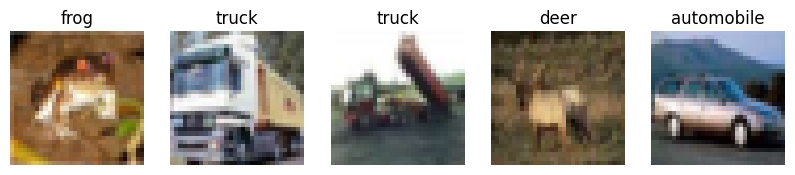

In [1]:
#Loading the CIFAR 10 dataset

#Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#Separating the training and testing dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

print(f'This is the training dataset : X_train - {X_train.shape}' )
print(f'This is the testing dataset : y_train - {y_train.shape}')
print(f'This is the training dataset : X_test - {X_test.shape}' )
print(f'This is the testing dataset : y_test - {y_test.shape}')

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Plot images in a row
num_images = 5
plt.figure(figsize=(10, 2))
for i in range(num_images):
    # Display original images
    ax = plt.subplot(1, num_images, i + 1)
    plt.imshow(X_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.show()



In [5]:
#Normalizing the training data

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [ ]:
# Training the ANN

# Reshape the y_train array to ensure it is in the correct shape
y_train = y_train.reshape(-1,)

# Print the first 5 elements of the reshaped y_train array
y_train[:5]

# Reshape the y_test array to ensure it is in the correct shape
y_test = y_test.reshape(-1,)

# Define the architecture of the Artificial Neural Network (ANN) using Sequential model
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),  # Flatten layer to convert the input images into a 1D array
    layers.Dense(3000, activation='relu'),  # Dense layer with 3000 neurons and ReLU activation function
    layers.Dense(1000, activation='relu'),  # Dense layer with 1000 neurons and ReLU activation function
    layers.Dense(10, activation='softmax')  # Dense output layer with 10 neurons (for 10 classes) and softmax activation function
])

# Compile the ANN model with stochastic gradient descent (SGD) optimizer,
# sparse categorical crossentropy loss function, and accuracy metric
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the ANN model using training data (X_train, y_train) for 5 epochs
ann.fit(X_train, y_train, epochs=5)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report  # Importing necessary functions from sklearn.metrics
import numpy as np  # Importing NumPy library and aliasing it as np

# Use the trained ANN model to make predictions on the test data
y_pred = ann.predict(X_test)

# Convert predicted probabilities to predicted classes by selecting the index with highest probability
y_pred_classes = [np.argmax(element) for element in y_pred]

# Print classification report containing precision, recall, F1-score, and support
print("Classification Report : \n", classification_report(y_test, y_pred_classes))

In [ ]:
# Use the trained ANN model to make predictions on the test data
y_pred = ann.predict(X_test)

# Print the predicted probabilities for the first 5 samples
print("Predicted probabilities for the first 5 samples:\n")
print(y_pred[:5])

# Extract the predicted classes from the predicted probabilities
y_classes = [np.argmax(element) for element in y_pred]

# Print the shape of the predicted probabilities array
print("\nShape of the predicted probabilities array:", y_pred.shape)

# Print the predicted classes for the first 5 samples
print("\nPredicted classes for the first 5 samples:")
print(y_classes[:5])


##Convolutional Neural Network

In [4]:
# Loading the CIFAR 10 dataset

# Importing necessary libraries
import tensorflow as tf  # Import TensorFlow library
from tensorflow.keras import datasets, layers, models  # Import necessary components from Keras
import matplotlib.pyplot as plt  # Import matplotlib for visualization
import numpy as np  # Import NumPy for numerical operations

# Separating the training and testing dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Define the architecture of the Convolutional Neural Network (CNN) using Sequential model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional layer with 32 filters and 3x3 kernel size, ReLU activation function, and input shape of (32, 32, 3)
    layers.MaxPooling2D((2, 2)),  # MaxPooling layer with pool size (2, 2)

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),  # Convolutional layer with 64 filters and 3x3 kernel size, ReLU activation function
    layers.MaxPooling2D((2, 2)),  # MaxPooling layer with pool size (2, 2)

    layers.Flatten(),  # Flatten layer to convert the 2D feature maps into a 1D vector
    layers.Dense(64, activation='relu'),  # Dense layer with 64 neurons and ReLU activation function
    layers.Dense(10, activation='softmax')  # Dense output layer with 10 neurons (for 10 classes) and softmax activation function
])

# Compile the CNN model with Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the CNN model using training data (X_train, y_train) for 10 epochs
cnn.fit(X_train, y_train, epochs=10)

# Evaluate the trained CNN model on the testing data (X_test, y_test)
cnn.evaluate(X_test, y_test)


Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 2.0581 - accuracy: 0.3338
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3669 - accuracy: 0.5075
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2296 - accuracy: 0.5583
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1442 - accuracy: 0.5936
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0779 - accuracy: 0.6183
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0180 - accuracy: 0.6378
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9685 - accuracy: 0.6602
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9231 - accuracy: 0.6740
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8856 - accuracy: 0.6859
Epoch 10/10
313/313 [==============================] - 5s 15ms/s

[1.0624825954437256, 0.6388000249862671]

In [83]:
# Use the trained CNN model to make predictions on the test data
y_pred = cnn.predict(X_test)

# Print the predicted probabilities for the first 5 samples
print("Predicted probabilities for the first 5 samples:\n")
print(y_pred[:5])

# Extract the predicted classes from the predicted probabilities
y_classes = [np.argmax(element) for element in y_pred]

# Print the shape of the predicted probabilities array
print("\nShape of the predicted probabilities array:", y_pred.shape)

# Print the predicted classes for the first 5 samples
print("\nPredicted classes for the first 5 samples:")
print(y_classes[:5])


313/313 [==============================] - 4s 13ms/step
Predicted probabilities for the first 5 samples:

[[6.5809608e-02 2.5206788e-03 3.1274118e-02 4.7626743e-01 4.0561449e-02
  2.5642997e-01 6.9999330e-02 4.1930042e-03 2.9335681e-02 2.3608727e-02]
 [3.7319818e-01 2.2984038e-01 5.8974745e-04 7.1099104e-04 2.1338825e-05
  1.4067563e-05 2.5283658e-05 2.3134686e-05 3.7084967e-01 2.4727236e-02]
 [1.8747251e-02 9.3246056e-03 4.9229176e-04 6.3314586e-04 5.5425513e-05
  1.5882326e-05 1.2006612e-04 2.7671835e-05 9.6626401e-01 4.3194857e-03]
 [9.6024334e-01 1.2495456e-04 5.4925531e-03 5.3982611e-04 3.9395117e-04
  6.1184684e-05 1.7154697e-04 5.4670396e-05 3.2180812e-02 7.3709944e-04]
 [2.0570506e-04 6.0054171e-03 3.5401262e-02 1.9252535e-02 2.4372907e-01
  2.8492056e-02 6.6390282e-01 1.3488942e-03 1.1460916e-03 5.1610800e-04]]

Shape of the predicted probabilities array: (10000, 10)

Predicted classes for the first 5 samples:
[3, 0, 8, 0, 6]


In [22]:
import numpy as np  # Import NumPy library and alias it as np

# Use np.argmax to extract the predicted classes from the predicted probabilities
y_pred_classes = [np.argmax(element) for element in y_pred]

# Convert the predicted classes list to a NumPy array
y_pred_classes = np.array(y_pred_classes)

# Reshape the y_test array to ensure it is in the correct shape
y_test = y_test.reshape(-1,)

# Print the predicted classes and actual classes for the first 10 test images
print("For the first 10 test images:")
print("Predicted classes:", y_pred_classes[:10])
print("Actual classes:", y_test[:10])

# Function to calculate accuracy
def calculate_accuracy(predicted_labels, actual_labels):
    # Count number of correct predictions
    num_correct = np.sum(predicted_labels == actual_labels)

    # Calculate accuracy
    accuracy = num_correct / len(actual_labels)

    return accuracy

# Calculate accuracy by comparing predicted classes with actual classes
accuracy = calculate_accuracy(y_pred_classes, y_test)
print("Accuracy:", accuracy)


For the first 10 test images
Predicted classes :  [3 0 8 0 6 6 5 6 3 1]
Actual classes :  [3 8 8 0 6 6 1 6 3 1]
Accuracy: 0.6345


Enter a number from 0 to 9 : 7

You have chosen the class horse

Here are 5 images belonging to the class horse




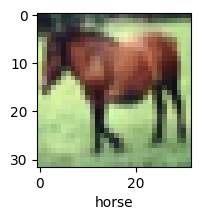

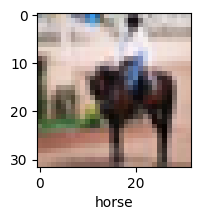

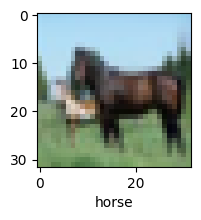

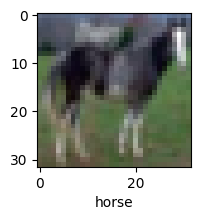

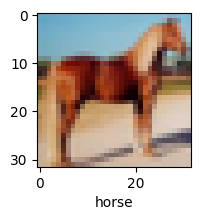

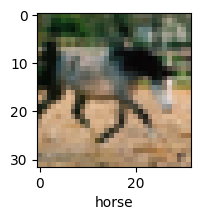

In [36]:
# Define class labels for CIFAR-10 dataset
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Reshape y_test and y_train arrays to ensure they are in the correct shape
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

# Function to plot a sample image with its corresponding class label
def plot_sample(X, y, index):
    plt.figure(figsize=(10, 2))
    plt.imshow(X[index])  # Display the image
    plt.xlabel(classes[y[index]])  # Set the label of the x-axis as the class label
    plt.show()

# Prompt the user to input a number from 0 to 9 representing a class label
a = int(input("Enter a number from 0 to 9 : "))

# Print the chosen class label
print(f'\nYou have chosen the class {classes[a]}\n')
print(f"Here are 5 images belonging to the class {classes[a]}\n")

count = 0  # Initialize a counter variable to keep track of the number of images displayed

# Loop through the first 100 images in the training dataset
for i in range(100):
    # Check if the label of the current image matches the chosen class label and the count is less than or equal to 5
    if y_train[i] == a and count <= 5:
        # Plot the image with its corresponding class label
        plot_sample(X_train, y_train, i)
        count = count + 1  # Increment the counter variable


Enter a number from 1 to 10000 : 1243

You have chosen the following image : 
Here are some images you might like : 
Accuracy :  0.7


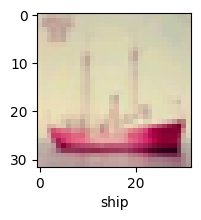

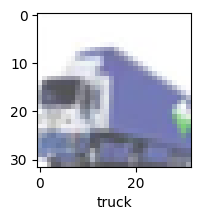

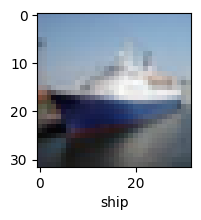

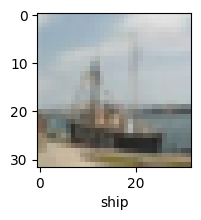

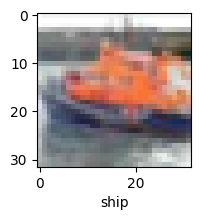

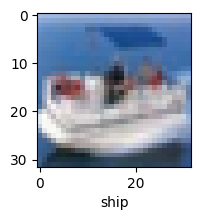

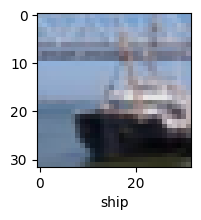

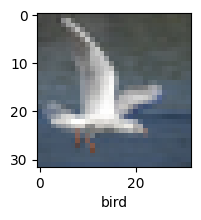

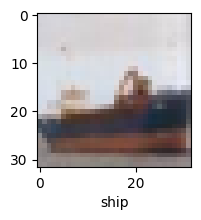

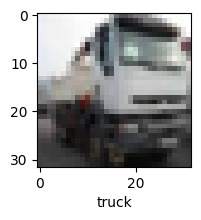

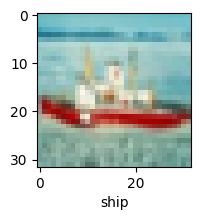

In [84]:
import random  # Import the random module

# Convert predicted probabilities to predicted classes using argmax
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes = np.array(y_pred_classes)

# Prompt the user to input a number representing the index of an image
a = int(input("Enter a number from 1 to 10000 : "))

print("\nYou have chosen the following image : ")

# Reshape y_test array to ensure it is in the correct shape
y_test = y_test.reshape(-1,)

# Get the actual label of the chosen image
actual_label = y_test[a]

# Plot the chosen image
plot_sample(X_test, y_test, a)

i = 0

acc_int = 0  # Initialize a variable to store the count of correctly predicted images
index = []  # Initialize a list to store the indices of randomly selected images

print("Here are some images you might like : ")

# Loop to randomly select and display 10 images
while i < 10:
    # Generate a random number between 0 and 9999
    random_number = random.randint(0, 9999)

    # Check if the predicted class of the randomly selected image matches the actual label
    if y_pred_classes[random_number] == actual_label:
        index.append(random_number)  # Append the index of the correctly predicted image to the list
        plot_sample(X_test, y_test, random_number)  # Plot the randomly selected image
        i = i + 1  # Increment the counter variable

        # Check if the true label of the randomly selected image matches the actual label
        if y_test[random_number] == actual_label:
            acc_int += 1  # Increment the count of correctly predicted images

# Calculate and print the accuracy based on the number of correctly predicted images out of 10
print("Accuracy : ", acc_int/10)
